# Introduction to Machine Learning
## Lecture 5 - Multilayer Perceptron
### Notebook 3: Hyperparameter Tuning with Grid Search
Prapared by: Said Bolluk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation

More info about the Breast Cancer Wisconsin (Diagnostic) Data Set: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

In [4]:
X.shape

(569, 30)

Class labels for breast cancer: Malignant (0), Benign (1)

In [5]:
# 212 - Malignant, 357 - Benign
print("Class labels:", np.unique(y))
print("Class distribution:", np.bincount(y))

Class labels: [0 1]
Class distribution: [212 357]


Check for the missing values

In [6]:
np.sum(np.isnan(X))

0

We have a binary classification task over a dataset with 30 features for 569 instances. The features, such as perimeter, texture, and compactness, were extracted from real images of breast cancer. The classes represent the nature of breast cancer. For example, Malignant (0) indicates ill-natured cancer, whereas Benign indicates good-natured cancer. There is no missing data in the dataset.

# Hyperparameter Tuning

We will now manipulate the hyperparameters of an MLP Classifier to obtain the optimal results. Note that we did not split the data into training and test set because we want to test different split combinations when tuning the hyperparameters with cross-validation (CV). CV will allow us to test each hyperparameter setting on different combinations of the dataset so the final results can represent the population rather than only the sample. Remember that in machine learning, generalization is a crucial topic.

We will use an existing library to create an MLP Classifier:

In [7]:
from sklearn.neural_network import MLPClassifier

Let us display the model's hyperparameters and their default settings:

In [8]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Since we cannot tune all the parameters above due to computational and time requirements, we will fix some of them. For example, the solver refers to the optimization function. We will use SGD for optimization. We will test the number of epochs for the final observation through the validation curve. Therefore, we will also fix the number of epochs to 500. We want to analyze instances one by one. Thus, the batch size is equal to one (1). Finally, the hidden layer size is a very complex phenomenon in ANN. Many scenarios can be tested to determine the optimal hidden layer setting. Therefore, we stick to a straightforward plan: having only one hidden layer with n hidden units. And the unit number n is the mean of the input (feature set) and output (target set) units. Since there are thirty (30) features and two (2) classes, n equals 16.
\
\
On the other hand, the hyperparameters we are interested in this section are **activation function, learning rate, and momentum.** The other parameters will remain default.

Create the model object with a hyperparameter setting:

In [13]:
mlp_classifier = MLPClassifier(
    solver="sgd",
    max_iter=500,
    batch_size=1,
    hidden_layer_sizes=(16,),
)

In [ ]:
# Scale the whole dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(X)  
X_scaled = scaler.transform(X)

Now we can start tuning the hyperparameters. We will use an existing library for this operation: **GridSearchCV**.

In [10]:
from sklearn.model_selection import GridSearchCV

In [14]:
# Create a dictionary for the hyperparameters and their possible values tested thorugh Grid Search
parameters = {
    "activation": ["logistic", "tanh"],
    "learning_rate_init": [5e-4, 1e-3, 5e-3, 8e-3, 1e-2],   
    "momentum": [0.5, 0.6, 0.7, 0.8, 0.9],
}

# Calculate the time
import timeit

start = timeit.default_timer()

# Use five different sets of data to improve generalization: cv=5
grid_search = GridSearchCV(mlp_classifier, parameters, verbose=1, cv=5)
# Fit whole data since CV will make the training and testing split for us
grid_search.fit(X_scaled, y)

stop = timeit.default_timer()
run_time = stop - start

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [35]:
# Print the total time for the hyperparameter tuning
print(f"Time (seconds): {run_time:.2f}")
print(f"Time (mins): {run_time/60:.2f}")

Time (seconds): 2908.96
Time (mins): 48.48


In [16]:
# According to Grid Search, optimal hyperparameter settings with the highest accuracy score:
print(f"Optimal setting: {grid_search.best_estimator_}")
print(f"Highest Accuracy: {grid_search.best_score_:3f}")

Optimal setting: MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=(16,),
              learning_rate_init=0.0005, max_iter=500, momentum=0.6,
              solver='sgd')
Highest Accuracy: 0.980686


Let us now decide on the optimal number of epochs using the validation curve. The validation curve will help us analyze the relationship between the epoch number and the model's training and testing performance. We will split our data into three sets: (1) Training and (2) Validation, and (3) Testing. After determining the optimal number of epochs utilizing the training and validation sets, we will test our model on the test set and publish the results accordingly.

In [17]:
# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_pre, X_test, y_pre, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_pre, y_pre, test_size=0.30, stratify=y_pre,random_state=42)

print("Training size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

print("Class distribution for training set:", np.bincount(y_train))
print("Class distribution for validation set:", np.bincount(y_val))
print("Class distribution for test set:", np.bincount(y_test))

Training size: 318
Validation size: 137
Test size: 114
Class distribution for training set: [119 199]
Class distribution for validation set: [51 86]
Class distribution for test set: [42 72]


Scale each set of data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Validation Curve

C:\Users\User\anaconda3\envs\pytorch_p37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\User\anaconda3\envs\pytorch_p37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\User\anaconda3\envs\pytorch_p37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\User\anaconda3\envs\pytorch_p37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  ConvergenceW

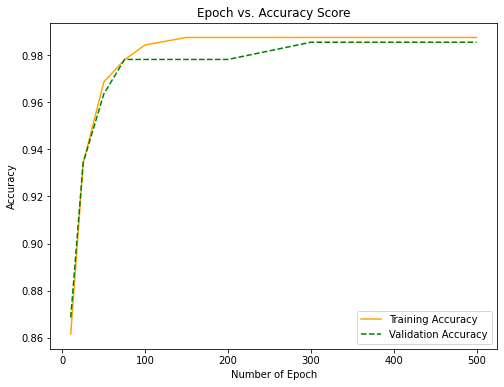

In [20]:
train_acc = list()
validation_acc = list()

epoch_list = [10, 25, 50, 75, 100, 150, 200, 300, 400, 500]

for epoch in epoch_list:
    
    mlp_classifier = MLPClassifier(
        solver="sgd",
        max_iter=epoch,
        batch_size=1,
        activation="logistic",
        hidden_layer_sizes=(16,),
        learning_rate_init=5e-4,
        momentum=0.6,     
    )
    
    # Train the model
    mlp_classifier.fit(X_train_scaled, y_train)
    
    # Make predictions and calculate the accuracy for the training and validations sets
    pred_train = mlp_classifier.predict(X_train_scaled)
    accuracy_train = np.sum(y_train==pred_train) / y_train.shape[0]
    pred_val = mlp_classifier.predict(X_val_scaled)
    accuracy_val = np.sum(y_val==pred_val) / y_val.shape[0]
    
    # Append the accuracy lists with the result of each epoch
    train_acc.append(accuracy_train)
    validation_acc.append(accuracy_val)
    
# Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(epoch_list, train_acc, color="orange", label="Training Accuracy")
plt.plot(epoch_list, validation_acc, color="green", label="Validation Accuracy", linestyle="--")
plt.title("Epoch vs. Accuracy Score")
plt.legend()
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")
plt.show()

According to the validation curve, the optimal epoch number is around 300 since the test accuracy stopped improving after this point. Even though higher epoch numbers enhanced the accuracy of the training set, we aim to increase the model's generalization capacity. Therefore, we determined the optimal number of the epoch as **300**. We will now perform a final analysis on the test set and publish the results accordingly.

# Evaluation of the Classification Model: MLP Classifier

In [21]:
# Define an MLP classifier with the optimal hyperparameter settings
mlp_classifier = MLPClassifier(
    solver="sgd",
    max_iter=300,
    batch_size=1,
    activation="logistic",
    hidden_layer_sizes=(16,),
    learning_rate_init=5e-4,
    momentum=0.6,
)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions over the test set
test_preds = mlp_classifier.predict(X_test_scaled)

# Calculate the accuracy
acc_test = np.sum(y_test==test_preds) / y_test.shape[0]
print(f"Final Accuracy: {acc_test:.3f}")

Final Accuracy: 0.965


## Classification Evaluation Metrics

Let us observe the classification results over several metrics, such as the F1 Score and Confusion Matrix.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
# Classification report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



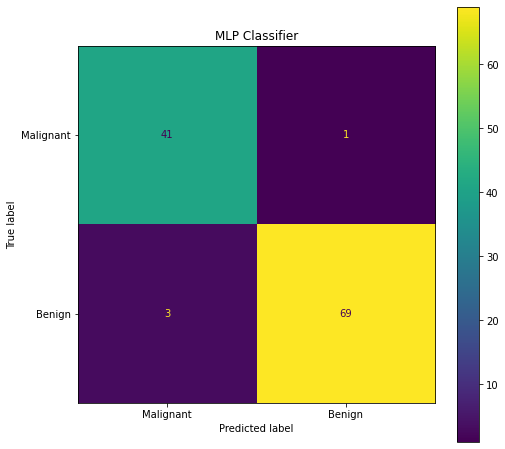

In [25]:
# Confusion Matrix
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
transaction = ["Malignant", "Benign"]
cm = confusion_matrix(y_test, test_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=transaction)
disp.plot(ax=ax, cmap="viridis")
plt.title("MLP Classifier")
plt.show()

**Discussion:** Our model made three (3) misclassification for the Benign class and one (1) misclassification for the Malignant class. Regarding the Cost-Sensitivity concept in machine learning, our model is more inclined to label people with ill-natured cancer as good-natured rather than the opposite. This is much safer than the reverse case. Plus, considering the high accuracy score of 0.965, we can say that our model is very satisfactory.

# END